In [51]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import statsmodels.api as sm

# Problem: Stayzilla Listing Room Price Prediction

In [354]:
# load the data 
data = pd.read_csv('stayzilla_com-travel_sample.csv') # original sample data with more columns

data1 = pd.read_csv('stayzilla_rough_cleaned.csv') # rough cleaned data 

# Data Processing 

In [305]:
# inspect the data
data.shape
data.head()

,additional_info,amenities,check_in_date,check_out_date,city,country,crawl_date,description,highlight_value,hotel_star_rating,...,query_time_stamp,room_price,room_types,search_term,service_value,similar_hotel,sitename,things_to_do,things_to_note,uniq_id
0,Acceptance Rate:100 percent|Response Time:< 6 hours,Newspaper,04-08-2016,05-08-2016,Kalimpong,India,2016-07-20,Sangsey Valley Resort is Located at the wonderful location of upper delo icchey dara gaon .Delo Hill is an extended nature park with very well mai...,NaN,NaN,...,2016-07-20 10:59:55 +0000,3167per night incl. tax,3 Bedded Room,NaN,Not Verified,NaN,www.stayzilla.com,NaN,"All taxes.|Complimentary Breakfast, Lunch and Dinner.",52a63c632d90923f7f0c394a79dce191
1,Acceptance Rate:100 percent|Response Time:< 6 hours,Parking|AC,04-08-2016,05-08-2016,Kanpur,India,2016-07-20,"What should you know? Enjoy unmatched service at affordable prices at Amantran Hotel. Laundry, doctor-on-call, car parking, and a travel desk for ...",NaN,NaN,...,2016-07-20 10:59:55 +0000,815per night incl. tax,Double Non-A/C Rooms,NaN,Not Verified,Hotel Mangalam|Hotel Maha Roopa Palace,www.stayzilla.com,NaN,"Kindly Note:|This Tariff is not applicable for long weekends, Government Holidays and festival period.",49ad3256fc231a4c9fdb6f6f2cc00d16
2,Acceptance Rate:100 percent|Response Time:< 6 hours,Pickup & Drop|Parking|AC,04-08-2016,05-08-2016,Jodhpur,India,2016-07-20,"What should you know? A budget hotel, this accommodation facility is located in the heart of Jodhpur City and is easily accessible from all major ...",NaN,NaN,...,2016-07-20 10:59:55 +0000,1624per night incl. tax,Deluxe AC Double,NaN,Not Verified,Gouri Heritage Haveli|The Regent Hotel|Vista Rooms at Khaas Bagh|Hotel Guru International,www.stayzilla.com,NaN,All taxes.|Complimentary Tea.,8b5952e578717e20b311846f7aab031f
3,Acceptance Rate:100 percent|Response Time:< 6 hours,WiFi|Newspaper|Pickup & Drop|Gym|Parking|AC,04-08-2016,05-08-2016,Jalpaiguri,India,2016-07-20,What should you know? The Riverwood Forest Retreats is part of the Dooars in North Bengal and set amidst the mountains of the foothills of the Him...,NaN,NaN,...,2016-07-20 10:59:55 +0000,3509per night incl. tax,Premium Single A/c,NaN,Not Verified,NaN,www.stayzilla.com,NaN,All taxes|Complimentary Breakfast|Kindly Note:|Extra Bed will be provided at additional charges that has to be paid to the hotel management at the...,032d715cabef6d4633e753de416929a8
4,Acceptance Rate:100 percent|Response Time:< 6 hours,Newspaper|AC,04-08-2016,05-08-2016,Kanpur,India,2016-07-20,"What should you know? Located at a walking distance from the South X Mall, Hotel Vijay Inter Continental provides a wide range of services to its ...",NaN,NaN,...,2016-07-20 10:59:55 +0000,5802per night incl. tax,Deluxe AC Double,NaN,Not Verified,Hotel Royal Cliff,www.stayzilla.com,NaN,Complimentary Breakfast.|Complimentary WiFi.|Complimentary Tea/Coffee maker in the room.|Service charge 10%|Kindly Note:|This Tariff is not applic...,ed546591dba770faae0ec3edadb0fcde


In [306]:
data.tail()

,additional_info,amenities,check_in_date,check_out_date,city,country,crawl_date,description,highlight_value,hotel_star_rating,...,query_time_stamp,room_price,room_types,search_term,service_value,similar_hotel,sitename,things_to_do,things_to_note,uniq_id
1202,~ All Taxes.~ Complimentary Bed Tea.~ Complimentary WiFi.,Restaurent | Business Center | Wifi | Swimming Pool | Credit Card | Laundry | Gym | Free Newspaper | Car Parking,06/01/2016,09/01/2016,Mandi,NaN,NaN,NaN,"What should you know?\n Midway resort, as the name suggests, is situated in Mandi Valley that falls between Chandigarh-Manali and Shimla-Manali Hi...",0.0,...,2015-12-30 15:21:16 +0000,NaN,Deluxe Room Non Ac | Deluxe Room Ac | Super Deluxe Room Ac | Family Suite Ac | Extra Bed,Mandi,Laundry | Free Newspaper | Parking,NaN,stayzilla,Restaurant | Swimming Pool | Health Club,NaN,8cdac0cb8c7c71a1731370750b5448f0
1203,~ All Taxes,Wifi | Laundry | Car Parking,06/01/2016,09/01/2016,Bhilwara,NaN,NaN,NaN,"What should you know?\n A budget hotel that offers two categories of rooms namely deluxe and luxury, Hotel City Plaza provides basic amenities to ...",0.0,...,2015-12-30 15:21:16 +0000,NaN,Deluxe Double | Luxury Double | Extra Bed,Bhilwara,Laundry | Parking | 24 hour check in | 24 hour check out,NaN,stayzilla,NaN,NaN,d091b4973071cbc2559c0db555db80f3
1204,Kindly Note ~ Hotel doesn't have Restaurants in the premises.,Laundry | Car Parking,06/01/2016,09/01/2016,Gandhinagar,NaN,NaN,NaN,What should you know?\n Hotel Shreeji boasts of 11 spacious and well-appointed rooms which are air-conditioned. The hotel provides Airport and Rai...,0.0,...,2015-12-30 15:21:16 +0000,NaN,Double Non A/c Room | Double A/c Room | Extra Bed,Gandhinagar,Laundry | Parking,NaN,stayzilla,NaN,NaN,9fb6e2266ea09509d668195b1250eed1
1205,~ All taxes.~ Complimentary WiFi. And Bed Tea; Coffee And News Paper.~ Complimentary Pickup And Drop From Bus Stand.,Wifi | Credit Card | Laundry | Free Newspaper | Car Parking,06/01/2016,09/01/2016,Uttarkashi,NaN,NaN,NaN,NaN,0.0,...,2015-12-30 15:21:16 +0000,NaN,Double Non A/c Room | Deluxe Non A/c Double | Deluxe A/c Double | Extra Bed,Uttarkashi,Laundry | Free Newspaper | Parking | 24 hour check in | 24 hour check out,NaN,stayzilla,NaN,NaN,6376a5202298fb78e0f9954a85b8a45c
1206,NaN,Bar/Pub | Wifi | Laundry | Free Newspaper,06/01/2016,09/01/2016,Goa,NaN,NaN,NaN,NaN,0.0,...,2015-12-30 15:21:16 +0000,NaN,Duplex Upstairs Hut Double | Duplex Downstairs Hut Double | Extra Bed,Goa Velha,Laundry | Free Newspaper,NaN,stayzilla,Bar,NaN,8d1913cb412923244fb6c5c333a3d8d1


In [307]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1207 entries, 0 to 1206
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   additional_info    1203 non-null   object 
 1   amenities          1154 non-null   object 
 2   check_in_date      1207 non-null   object 
 3   check_out_date     1207 non-null   object 
 4   city               1207 non-null   object 
 5   country            1139 non-null   object 
 6   crawl_date         1139 non-null   object 
 7   description        919 non-null    object 
 8   highlight_value    52 non-null     object 
 9   hotel_star_rating  68 non-null     float64
 10  image_count        985 non-null    float64
 11  image_urls         947 non-null    object 
 12  internet           68 non-null     object 
 13  landmark           68 non-null     object 
 14  latitude           1207 non-null   float64
 15  longitude          1207 non-null   float64
 16  occupancy          1139 

In [308]:
# check missing values
data.isnull().sum()

additional_info         4
amenities              53
check_in_date           0
check_out_date          0
city                    0
country                68
crawl_date             68
description           288
highlight_value      1155
hotel_star_rating    1139
image_count           222
image_urls            260
internet             1139
landmark             1139
latitude                0
longitude               0
occupancy              68
pageurl                 0
property_address        0
property_id             0
property_name           0
property_type           0
qts                    68
query_time_stamp        0
room_price             68
room_types              0
search_term          1139
service_value           1
similar_hotel         382
sitename                0
things_to_do         1167
things_to_note        230
uniq_id                 0
dtype: int64

For the purpose of modeling, we will use the features that could affect the property price to a certain degree and are not sustaintially missing. We will not use features that are not obviously relevant to price prediction such as  `property_name`, nor features that has many missing values. <br>

In [500]:
# extract possible features  
features = ['additional_info', 'city', 'amenities', 'description' , 'image_count', 'latitude', 'longitude', 'occupancy','property_id',
           'property_type','room_price',  'room_types', 'service_value', 'similar_hotel', 'things_to_do']
data0 = data[data.check_in_date == '04-08-2016'][['additional_info', 'city', 'amenities', 'description' , 'image_count', 'latitude', 'longitude', 'occupancy','property_id',
           'property_type','room_price',  'room_types', 'service_value', 'similar_hotel', 'things_to_do']]

# remove duplicated property id
data0.drop_duplicates(subset=['property_id'], inplace=True)
data1.drop_duplicates(subset=['property_id'], inplace=True)


The sample dataset has 36 columns in total. After inspecting each column, we found the data in some columns is not equally available between two different check-in dates. We will use the data with check-in data on 04-08-2016 because it has a larger portion in total rows than the other check-in date. <br>


In [501]:
data0.shape

(1139, 15)

# Feature engineering


### Extract numerical values from categorical variables

In [502]:
# three columns (i.e. amenities, room_type, things_to_note) may contain 'AC'/'WIFI' information
# to determine if a property has wifi or AC, we compare all three columns to extract such information. 
combo = data0[['amenities', 'room_types', 'things_to_do']].fillna('')
data0['combined'] = combo['amenities'] + ' ' + combo['room_types'] + ' ' + combo['things_to_do'] 

# add 'wifi' column if a property has wifi
data0['wifi'] = data0.combined.apply(lambda x: 1 if 'wifi' in x.lower() else 0)

# add 'ac' column if a property has ac
data0['ac'] = data0.combined.apply(lambda x: 1 if 'ac' in x.lower() else 0)

# add 'breakfast' column if a property has free breakfast
data0['breakfast'] = data0.combined.apply(lambda x: 1 if 'breakfast' in x.lower() else 0)

In [503]:
#  'num_amenities': transform 'amenities' into a numerical variable
import re
data0['num_amenities'] = data0['amenities'].apply(lambda x: [] if pd.isnull(x) else re.split(r'[/|&\s]\s*', x))
data0['num_amenities'] = data0['num_amenities'].apply(lambda x: list(filter(None, x)))
data0['num_amenities'] = data0['num_amenities'].apply(len)

In [504]:
# 'num_descrption': count the number of words in a description, 0 if NaN 
data0['descr_len']= data0.description.apply(lambda x: 0 if pd.isnull(x) else len(x.split()))

In [505]:
# convert 'room_type' to a binary variable 'deluxe': 1 if it contains the word 'deluxe' or ''Superior', else 0 
data0.room_types = data0.room_types.apply(lambda x: x.lower())
data0['deluxe'] = data0.room_types.apply(lambda x: 1 if ('deluxe' in x) or ('superior' in x) else 0)

In [506]:
# 'num_similar_hotels': transform 'similar hotel' into numerical valye 
data0['num_simhotel'] = data0['similar_hotel'].apply(lambda x: [] if pd.isnull(x) else re.split(r'[/|&\s]\s*', x))
data0['num_simhotel'] = data0['num_simhotel'].apply(lambda x: list(filter(None, x)))
data0['num_simhotel'] = data0['num_simhotel'].apply(len)

In [507]:
# 'service value': encode it to 1 if verified,  0 if not or NA
data0['service_value'] = data0['service_value'].apply(lambda x: 1 if x == 'Verified' else 0)

In [544]:
# split 'additional_info' to two columns: 'acceptance_rate' and 'response_time'
infodf = data0.additional_info.str.split('|',1, expand=True)

In [509]:
infodf.iloc[:,-2].unique()

array(['Acceptance Rate:100 percent', 'Acceptance Rate:60 percent',
       'Response Time:22 minutes', 'Response Time:< 6 hours',
       'Response Time:25 minutes', 'Acceptance Rate:0 percent',
       'Response Time:7 minutes', 'Response Time:51 minutes',
       'Response Time:1 minute', 'Acceptance Rate:50 percent',
       'Response Time:14 minutes', 'Acceptance Rate:75 percent',
       'Acceptance Rate:67 percent', 'Response Time:19 minutes',
       'Response Time:36 minutes', 'Acceptance Rate:25 percent',
       'Response Time:17 minutes', 'Response Time:34 minutes'],
      dtype=object)

In [545]:
# extract'acceptance rate' and 'response time'
# 1. swap inconsistent acceptance and response time in the two columns
for i in range(len(infodf)):
    if 'Response' in infodf.iloc[i,-2]:
        infodf.iloc[i,[-2,-1]] = infodf.iloc[i,[-1, -2]]
infodf = infodf.rename(columns={0: "acceptance_rate", 1: "response_time"})
infodf.iloc[:,-1].unique()

array(['Response Time:< 6 hours', 'Response Time:> 24 hours',
       'Response Time:22 minutes', 'Response Time:25 minutes',
       'Response Time:16 hours', 'Response Time:23 hours',
       'Response Time:30 minutes', 'Response Time:21 hours',
       'Response Time:7 minutes', 'Response Time:10 minutes',
       'Response Time:26 minutes', 'Response Time:21 minutes',
       'Response Time:18 hours', 'Response Time:46 minutes',
       'Response Time:51 minutes', 'Response Time:1 minute',
       'Response Time:11 hours', 'Response Time:14 minutes',
       'Response Time:39 minutes', 'Response Time:10 hours',
       'Response Time:6 hours', 'Response Time:13 hours',
       'Response Time:9 minutes', 'Response Time:15 hours',
       'Response Time:7 hours', 'Response Time:20 hours',
       'Response Time:42 minutes', 'Response Time:19 minutes',
       'Response Time:36 minutes', 'Response Time:47 minutes',
       'Response Time:18 minutes', 'Response Time:12 hours',
       'Response Time:1

In [517]:
infodf.acceptance_rate.unique()

array(['Acceptance Rate:100 percent', 'Acceptance Rate:60 percent',
       'Acceptance Rate:57 percent', 'Acceptance Rate:0 percent',
       'Acceptance Rate:50 percent', 'Acceptance Rate:56 percent',
       'Acceptance Rate:33 percent', 'Acceptance Rate:67 percent',
       'Acceptance Rate:75 percent', 'Acceptance Rate:25 percent',
       'Acceptance Rate:78 percent'], dtype=object)

In [549]:
infodf.acceptance_rate = infodf.acceptance_rate.apply(lambda x: int(re.findall(r'\d+', x)[0]))
infodf.response_time = infodf.response_time.apply(lambda x: int(re.findall(r'\d+', x)[0]))

In [552]:
# 2. group 'response time' into three categories: <= 6hr(0), 6-24 hr(1), >24 hr (2)
infodf['response_label']= infodf.response_time.apply(lambda x: 0 if x <= 6 else(2 if x>24 else 1))

### Encode categorical variable

In [418]:
# encode 'property_type' 
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
results = encoder.fit_transform(data0[['property_type']])
property_type = pd.DataFrame(results.toarray(), columns=encoder.categories_)

### Transform geolocation information to zones

[2 0 3 ... 0 0 0]
[[26.1236228  81.55766353]
 [13.14838039 77.46999232]
 [25.16267444 87.2750455 ]
 [28.39978587 75.58300457]]


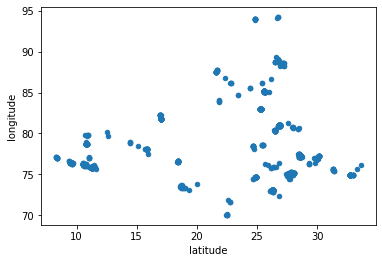

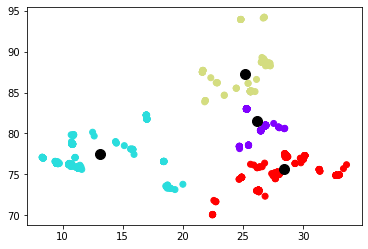

In [558]:
# use KNN to cluster longtitude and latitude: by looking at the scatter plot, we think 4 clusters would be a good threshold  
data0.plot.scatter(x='latitude', y='longitude')

# K-means clustering
X = data0[['latitude', 'longitude']]
kmeans = KMeans(n_clusters=4)
y_kmeans = kmeans.fit_predict(X) 
print(y_kmeans) 
centroids = kmeans.cluster_centers_
print(centroids)
plt.figure(figsize=(6,4))
plt.scatter(X['latitude'], X['longitude'], c=y_kmeans, cmap='rainbow')
plt.scatter(centroids[:,0], centroids[:,1], c='black', s=100)
plt.show()

# add labels back the data
data0['zones'] = y_kmeans

### Finalize selected features

In [559]:
# select relevant features 
dfa = data1[['description', 'city', 'image_count', 'room_price', 'adult_occupancy', 'child_occupancy']]
dfb = data0[['property_id', 'num_amenities', 'zones', 'descr_len','deluxe','num_simhotel', 'wifi','ac','breakfast', 'service_value']]
dfc = infodf[['acceptance_rate', 'response_label']]
property_type.columns = ['Apartment', 'Homestay', 'Hotel','House','Lodge', 'Resort', 'Spa', 'Villa' ]
clean_data = pd.concat([dfa,dfb,dfc, property_type], axis=1)


# Data cleaning

In [2]:
clean_data = pd.read_csv('stayzillaCleanFeatures.csv')
clean_data.head()
#clean_data.to_csv('stayzillaCleanFeatures.csv')

,Unnamed: 0,description,city,image_count,room_price,adult_occupancy,child_occupancy,property_id,num_amenities,zones,...,acceptance_rate,response_label,Apartment,Homestay,Hotel,House,Lodge,Resort,Spa,Villa
0,0,Sangsey Valley Resort is Located at the wonder...,Kalimpong,3.0,3167.0,3.0,2.0,67368.0,1.0,2.0,...,100.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1,What should you know? Enjoy unmatched service ...,Kanpur,0.0,815.0,2.0,2.0,28733.0,2.0,0.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,"What should you know? A budget hotel, this acc...",Jodhpur,18.0,1624.0,2.0,2.0,53742.0,4.0,3.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,3,What should you know? The Riverwood Forest Ret...,Jalpaiguri,9.0,3509.0,1.0,2.0,15468.0,7.0,2.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4,What should you know? Located at a walking dis...,Kanpur,5.0,5802.0,2.0,2.0,47032.0,2.0,0.0,...,100.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [3]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1203 non-null   int64  
 1   description      919 non-null    object 
 2   city             1203 non-null   object 
 3   image_count      981 non-null    float64
 4   room_price       1139 non-null   float64
 5   adult_occupancy  1139 non-null   float64
 6   child_occupancy  1139 non-null   float64
 7   property_id      1139 non-null   float64
 8   num_amenities    1139 non-null   float64
 9   zones            1139 non-null   float64
 10  descr_len        1139 non-null   float64
 11  deluxe           1139 non-null   float64
 12  num_simhotel     1139 non-null   float64
 13  wifi             1139 non-null   float64
 14  ac               1139 non-null   float64
 15  breakfast        1139 non-null   float64
 16  service_value    1139 non-null   float64
 17  acceptance_rat

In [4]:
# check missing values
clean_data.isnull().sum()

# remove missing values in target variable 'room_price'
clean_data = clean_data.dropna(subset=['room_price'])

# impute missing value in image_count as 0 
clean_data.image_count = clean_data.image_count.fillna(0)

In [5]:
clean_data.isnull().sum()
print('missing value percentage:', clean_data.description.isnull().sum()/clean_data.shape[0])

missing value percentage: 0.19315188762071994


* After imputation, the only missing values are texts in 'description' column. We will leave this for now as we would not feed this feature to the regression model. 

# Transh
### Process text data 
* To take description text content into account, one possible feature would be the sentiment score for each description. It may be interesting to see if sentiment of a property description has effect on the price prediction 

In [154]:
test = clean_data.dropna()
test.shape[0]/clean_data.shape[0]

0.6619718309859155

In [ ]:
textdata = clean_data[['description', 'property_id']] 
textdata['description'] = 


In [155]:
pd.set_option('max_colwidth',150)
import re, string

textdata = clean_data[['description', 'property_id']].dropna()

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower() # make all text to lowercase
    text = re.sub('\[.*?\]', '', text) # getting rid of data in brackets.  
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) #get rid of punctuation marks
    text = re.sub('\w*\d\w*', '', text) #\d all digits, \w alphanumeric. Get rid of words containing numbers
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text

text_clean = pd.DataFrame(textdata.description.apply(lambda x: clean_text(x)))


,description,property_id
0,Sangsey Valley Resort is Located at the wonderful location of upper delo icchey dara gaon .Delo Hill is an extended nature park with very well mai...,67368.0
1,"What should you know? Enjoy unmatched service at affordable prices at Amantran Hotel. Laundry, doctor-on-call, car parking, and a travel desk for ...",28733.0
2,"What should you know? A budget hotel, this accommodation facility is located in the heart of Jodhpur City and is easily accessible from all major ...",53742.0
3,What should you know? The Riverwood Forest Retreats is part of the Dooars in North Bengal and set amidst the mountains of the foothills of the Him...,15468.0
4,"What should you know? Located at a walking distance from the South X Mall, Hotel Vijay Inter Continental provides a wide range of services to its ...",47032.0
...,...,...
1134,What should you know? Hotel Sky High is part of a budget group of hotels that offer stylish interiors and modern facilities. Amenities include spa...,31659.0
1135,"What should you know? Saubhagya Inn is situated on Station Road. This 3 star hotel provides facilities like 24-hour front desk, travel counter, ba...",25517.0
1136,"What should you know? Located at a walkable distance from the Manak Nagar Railway station, Hotel Mohan has a total of 68 AC rooms that are categor...",789.0
1137,"What should you know? Situated 13 km away from the Chaudhary Charan Singh International Airport, Hotel Manglam offers rooms at reasonable rates. G...",13628.0


In [364]:
t=''
TextBlob(t).subjectivity

0.0

In [166]:
# get polarity score and subjectivity score using TextBlob
from textblob import TextBlob 

textdata['desc_polarity'] = text_clean.description.apply(lambda x: TextBlob(x).polarity)
textdata['desc_subjectivity'] = text_clean.description.apply(lambda x: TextBlob(x).subjectivity)

# attach the scores to original cleaned data set 

,description,property_id,desc_polarity,desc_subjectivity
0,Sangsey Valley Resort is Located at the wonderful location of upper delo icchey dara gaon .Delo Hill is an extended nature park with very well mai...,67368.0,0.377778,0.633333
1,"What should you know? Enjoy unmatched service at affordable prices at Amantran Hotel. Laundry, doctor-on-call, car parking, and a travel desk for ...",28733.0,0.240000,0.580000
2,"What should you know? A budget hotel, this accommodation facility is located in the heart of Jodhpur City and is easily accessible from all major ...",53742.0,0.221845,0.370714
3,What should you know? The Riverwood Forest Retreats is part of the Dooars in North Bengal and set amidst the mountains of the foothills of the Him...,15468.0,0.366667,0.388889
4,"What should you know? Located at a walking distance from the South X Mall, Hotel Vijay Inter Continental provides a wide range of services to its ...",47032.0,0.083333,0.508333
...,...,...,...,...
1134,What should you know? Hotel Sky High is part of a budget group of hotels that offer stylish interiors and modern facilities. Amenities include spa...,31659.0,0.187965,0.447749
1135,"What should you know? Saubhagya Inn is situated on Station Road. This 3 star hotel provides facilities like 24-hour front desk, travel counter, ba...",25517.0,0.190625,0.621875
1136,"What should you know? Located at a walkable distance from the Manak Nagar Railway station, Hotel Mohan has a total of 68 AC rooms that are categor...",789.0,0.065278,0.497222
1137,"What should you know? Situated 13 km away from the Chaudhary Charan Singh International Airport, Hotel Manglam offers rooms at reasonable rates. G...",13628.0,0.175000,0.262500
